# Joshua Milliken

## Best Inequality Statistic for Corruption Perception Predictions

Looking at many inequality indicators and finding which has the highest correlation with the Corruption Perception Index (CPI).

In [12]:
import pandas as pd
import datapackage
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from project_functions1 import load_and_process, scatter_plot1, sp50, cpi_timeseries, cpi_year

ImportError: cannot import name 'sp50' from 'project_functions1' (c:\Users\jtleg\UBC21-22\DATA301\group35-project\notebooks\project_functions1.py)

## Exploritory Analysis

In [13]:
CID = load_and_process()

In [93]:
print("Number of rows and columns:", CID.shape)
print(f"Number of Countries: {CID['country'].nunique()}")

Number of rows and columns: (7344, 7)
Number of Countries: 24


In [8]:
CID.head()

,country,variable,percentile,year,value,age,pop
0,SC,sptinc992j,p90p100,1998,0.5271,992,j
1,MU,sptinc992j,p90p100,1998,0.4578,992,j
2,DZ,sptinc992j,p90p100,1998,0.4193,992,j
3,TN,sptinc992j,p90p100,1998,0.4888,992,j
4,BW,sptinc992j,p90p100,1998,0.6949,992,j


In [9]:
CID.describe()

,country,variable,percentile,year,value,age,pop
count,7344,7344,7344,7344,7344,7344,7344
unique,24,5,6,18,2694,3,3
top,SC,sptinc992j,p0p100,1998,-,992,i
freq,306,1728,5184,408,69,5184,5184


In [179]:
'''
def scatter_plot1(CC = 'MU'):
    CC_D = CID.loc[CID['country'] == CC]
    plt.title(f"Country : {CC}")
    plt.xlabel(f"Top 1% Share Nat. Income")
    plt.ylabel(f"CPI Index")
    plt.plot(CC_D.loc[CC_D['percentile'] == 'p99p100']['value'], CC_D.loc[CC_D['variable'] == 'CPI']['value'], 'o', color = 'green')
'''

In [10]:
scatter_plot1()

NameError: name 'plt' is not defined

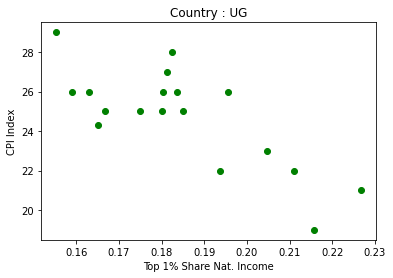

In [67]:
scatter_plot1('UG')

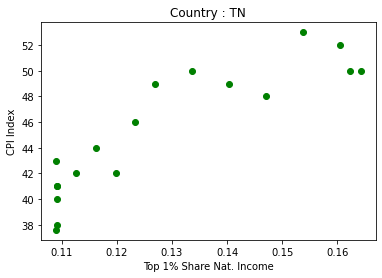

In [68]:
scatter_plot1('TN')

In [82]:
'''def sp50(CC = 'MU'):
    CC_D = CID.loc[CID['country'] == CC]
    plt.title(f"Country : {CC}")
    plt.xlabel(f"Bottom 50% Share Nat. Income")
    plt.ylabel(f"CPI Index")
    plt.plot(CC_D.loc[CC_D['percentile'] == 'p0p50']['value'], CC_D.loc[CC_D['variable'] == 'CPI']['value'], 'o', color = 'red')'''

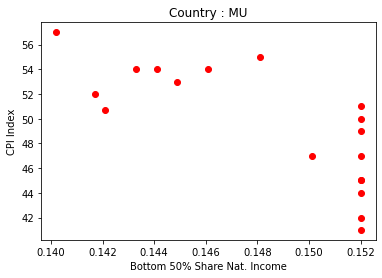

In [83]:
sp50()

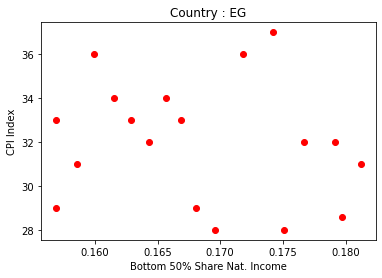

In [84]:
sp50('EG')

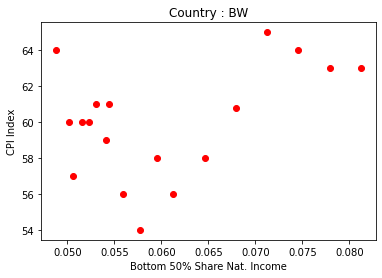

In [85]:
sp50('BW')

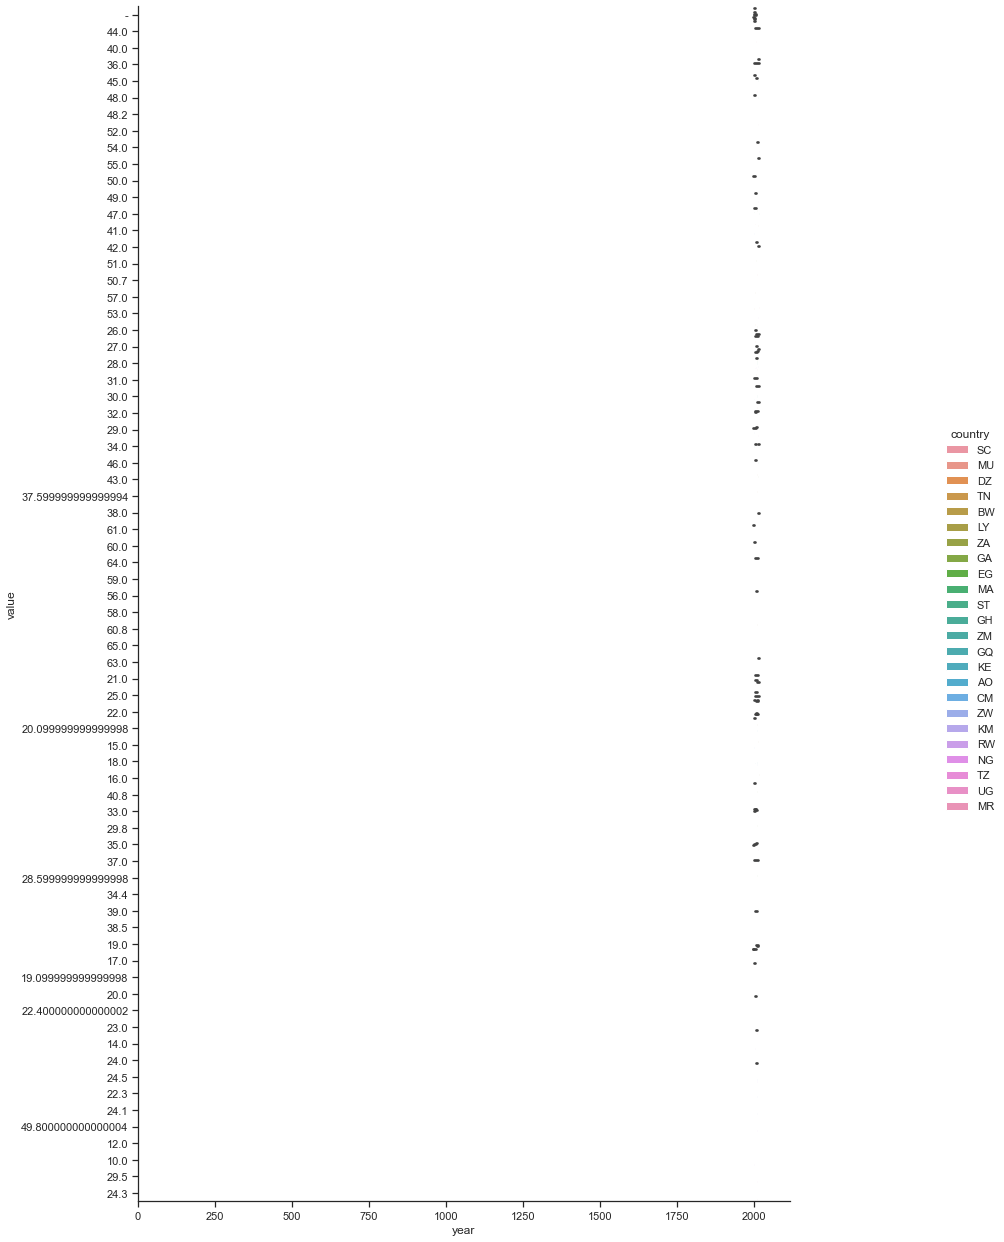

In [103]:
'''CPI = CID.loc[CID['variable'] == 'CPI']
sns.set_theme(style = "ticks")
ax = sns.catplot(x='year', y='value', hue = "country", data = CPI, kind = 'bar')
ax.fig.set_size_inches(20,20)

In [174]:
'''def cpi_timeseries(CC= 'UG'):
    CPI = CID.loc[CID['variable'] == 'CPI']
    CPI_UG = CPI.loc[CPI['country'] == CC]
    CPI_UG = CPI_UG.loc[CPI_UG['value'] != '-']
    plt.rcParams["figure.figsize"] = [10, 4]
    CPI_time = sns.barplot(x="year", y="value", data=CPI_UG)
    CPI_time.set_xlabel("Year")
    CPI_time.set_ylabel("CPI")
    CPI_time.set_title(f"CPI index over time in {CC}")

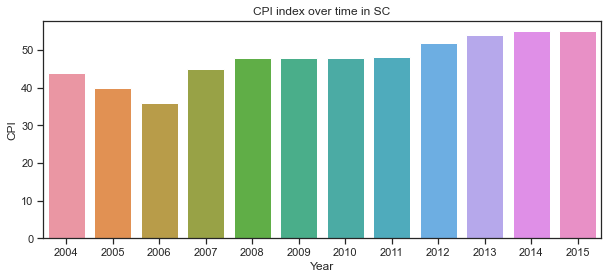

In [176]:
cpi_timeseries('SC')

In [171]:
'''def cpi_year(year = 2015):
    CPI = CID.loc[CID['variable'] == 'CPI']
    CC_year = CPI.loc[CPI['year'] == year]
    CC_year = CC_year.loc[CC_year['value'] != '-']
    CC_yearPlot = sns.barplot(x = 'country', y = 'value', data = CC_year)
    CC_yearPlot.set_title(f"CPI values in {year}")

    

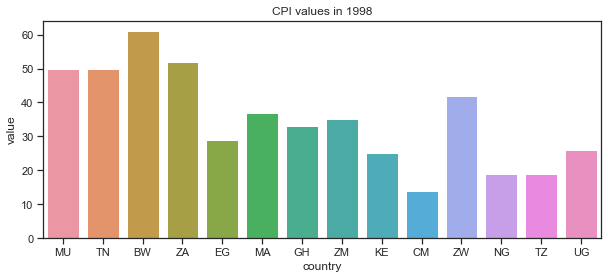

In [173]:
cpi_year(1998)